In [1]:
import numpy as np
import pandas as pd

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
import seaborn as sns
sns.set_style('whitegrid')

In [4]:
import snsims

In [5]:
from snsims import SersicSamples

In [6]:
print(snsims.__version__)

1.2.11


In [7]:
from desc.sims.GCRCatSimInterface.simCat_DC2sndb import DC2SN

In [8]:
from astropy.cosmology import FlatLambdaCDM

In [9]:
DC2 = FlatLambdaCDM(H0=71, Om0=0.265, Ob0=0.0448)

### Hostless SN and SN hosted in galaxies

In [10]:
#galaxy file name (contains galaxies with data from the rotated reference catalog and the gcr)
galfilename = '/Users/rbiswas/data/LSST/DC2/protoDC2_rotated_combined.hdf'

In [11]:
galsdf = pd.read_hdf(galfilename)

In [12]:
zdist = snsims.PowerLawRates(rng=np.random.RandomState(1),
                             alpha=2.6e-5,
                             fieldArea=25,
                             surveyDuration=10.,
                             cosmo=DC2,
                             zbinEdges=np.arange(0.001, 1.4, 0.02))

In [13]:
snPop = snsims.GMM_SALT2Params(numSN=None, zSamples=zdist.zSamples, rng=np.random.RandomState(2),
                               mjdmin=59580, cosmo=DC2, surveyDuration=10.)

In [14]:
sn = DC2SN(galsdf, snPop)

## Trivial to separate out the Hostless SN

In [15]:
sn.hostless_snparams.head()#to_csv('MainSurveyHostless.csv')

/Users/rbiswas/doc/projects/DESC/sims_GCRCatSimInterface/python/desc/sims/GCRCatSimInterface/simCat_DC2sndb.py:83: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._hostlessSN['snra'] = ra
/Users/rbiswas/doc/projects/DESC/sims_GCRCatSimInterface/python/desc/sims/GCRCatSimInterface/simCat_DC2sndb.py:84: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._hostlessSN['sndec'] = dec


,c,mB,snid,t0,x0,x1,z,rand_host,snra,sndec
1,-0.086048,-19.621065,1,59674.630746,0.002093,1.579310,0.052377,0.946963,54.649110,-30.301250
15,0.000704,-19.133796,15,62446.473290,0.000934,0.385520,0.062331,0.978427,56.165622,-30.706847
24,-0.084374,-19.542698,24,60044.133897,0.000554,-1.209905,0.095701,0.942166,52.564572,-28.220503
49,0.022788,-19.181933,49,63061.159128,0.000242,1.594282,0.119959,0.955740,54.075663,-27.458988
50,-0.000707,-18.912978,50,61566.359785,0.000198,0.937432,0.117542,0.901602,53.297779,-30.869266


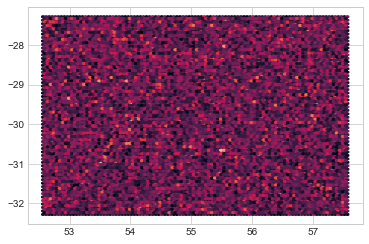

In [16]:
fig, ax = plt.subplots()
ax.hexbin(sn.hostless_snparams.snra, sn.hostless_snparams.sndec)

In [27]:
sn.hostless_snparams.query('z < 1.0').to_csv('../data/MainSurvey_hostlessSN.csv', index=False, sep=' ')

In [31]:
sn.hostless_snparams.query('z > 1.0').to_csv('../data/MainSurvey_hostlessSN_highz.csv', index=False, sep=' ')

In [29]:
!wc -l ../data/MainSurvey_hostlessSN.csv

    6327 ../data/MainSurvey_hostlessSN.csv


In [32]:
!wc -l ../data/MainSurvey_hostlessSN_highz.csv

   36876 ../data/MainSurvey_hostlessSN_highz.csv


In [33]:
MainSurveyMapper, hostedSNParams = sn.assignHosts()

/Users/rbiswas/doc/projects/DESC/sims_GCRCatSimInterface/python/desc/sims/GCRCatSimInterface/simCat_DC2sndb.py:98: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.hostedSN['zbin'] = self.hostedSN.z // binwidth
/Users/rbiswas/doc/projects/DESC/sims_GCRCatSimInterface/python/desc/sims/GCRCatSimInterface/simCat_DC2sndb.py:99: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.hostedSN['zbin'] = self.hostedSN.zbin.astype(np.int)
/Users/rbiswas/doc/projects/DESC/sims_GCRCatSimInterface/python/desc/sims/GCRCatSimInterface/simCat_DC2sndb.py:100

Index(['snid'], dtype='object')


In [34]:
MainSurveyMapper.head()

,galaxy_id
snid,
0,14128328
2,3631948
4,1178427
3,19727056
5,327975


In [35]:
hostedSNParams.columns

Index(['c', 'mB', 't0', 'x0', 'x1', 'rand_host', 'zbin', 'diskMassStellar',
       'morphology/diskHalfLightRadiusArcsec',
       'morphology/diskMinorAxisArcsec', 'morphology/positionAngle',
       'morphology/spheroidHalfLightRadiusArcsec',
       'morphology/spheroidMinorAxisArcsec', 'size_bulge_true',
       'size_disk_true', 'totalMassStellar', 'uniqueId', 'raJ2000_gal',
       'decJ2000_gal', 'z', 'zbin_gals', 'snid'],
      dtype='object')

In [36]:
hostedSNParamsPos = sn.get_positions(hostedSNParams, np.random.RandomState(3))

In [37]:
hostedSNParamsPos.head()

,c,mB,t0,x0,x1,rand_host,zbin,diskMassStellar,morphology/diskHalfLightRadiusArcsec,morphology/diskMinorAxisArcsec,...,size_disk_true,totalMassStellar,uniqueId,raJ2000_gal,decJ2000_gal,z,zbin_gals,snid,snra,sndec
galaxy_id,,,,,,,,,,,,,,,,,,,,,
14128328,0.023105,-18.940587,61171.381393,0.002897,-0.000657,0.517298,1,2.048596e+08,9.169147,5.993396,...,9.169147,2.051599e+09,14467407951,53.799949,-28.039560,0.025000,1,0,53.797118,-28.036403
3631948,0.033669,-19.277099,61586.268044,0.001888,0.593434,0.765460,2,2.191841e+07,0.653050,0.450330,...,0.653050,9.984373e+07,3719114831,53.692061,-28.641685,0.044002,2,2,53.692421,-28.641689
19727056,0.079936,-18.388936,61168.926733,0.000499,-1.237251,0.282396,3,1.605349e+10,0.878642,0.652980,...,0.878642,4.822743e+10,20200505423,54.511852,-25.688198,0.068016,3,3,54.512041,-25.687945
1178427,0.055182,-18.939550,61114.342478,0.001118,-0.817976,0.221045,2,1.191469e+10,3.617596,3.093619,...,3.617596,1.573734e+10,1206709327,54.902996,-28.665679,0.041370,2,4,54.903665,-28.664541
327975,-0.121415,-19.727505,60785.722097,0.001316,1.150217,0.686222,3,7.321853e+09,1.510661,1.146656,...,1.510661,9.919756e+09,335846479,55.586824,-28.109538,0.078653,3,5,55.587425,-28.108766


In [38]:
hostedSNParamsPos.to_csv('../data/MainSurveyHostedSNPositions.csv', sep=' ', index=True)

In [40]:
!head ../data/MainSurveyHostedSNPositions.csv

galaxy_id c mB t0 x0 x1 rand_host zbin diskMassStellar morphology/diskHalfLightRadiusArcsec morphology/diskMinorAxisArcsec morphology/positionAngle morphology/spheroidHalfLightRadiusArcsec morphology/spheroidMinorAxisArcsec size_bulge_true size_disk_true totalMassStellar uniqueId raJ2000_gal decJ2000_gal z zbin_gals snid snra sndec
14128328 0.023105473865257332 -18.940586633358045 61171.381392818315 0.0028965856415386995 -0.000656597469069875 0.5172978838465893 1 204859570.0156721 9.16914727711386 5.99339601670363 26.1782816984521 17.529207285934906 9.322801312563783 17.529207285934906 9.16914727711386 2051599062.9200664 14467407951 53.79994927 -28.03956023 0.0249995 1 0 53.797118497680735 -28.036402868121158
3631948 0.033669384644307986 -19.27709936874189 61586.26804425729 0.0018876939968147397 0.5934335095701836 0.7654597593969069 2 21918413.453376316 0.6530500141423426 0.45033011267262674 154.77156180249827 1.1853895608780796 1.021358043173839 1.1853895608780796 0.6530500141423426 9

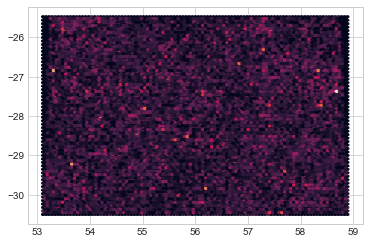

In [41]:
fig, ax = plt.subplots()
ax.hexbin(hostedSNParamsPos.snra, hostedSNParamsPos.sndec)